### Exploratory Data Analysis

I begin my EDA by familiarizing myself with the given features and taking a cursory look at their relationship with Sales Price.

For categorical data I grouped feature and salesprice by category and looked at mean prices to get a sense of what feature engineering might be useful if any.

For numerical data I used plots and stats to identify feature relationship with sales price. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../datasets/cleaned_housing_data.csv', keep_default_na=False, na_values=[''])
pd.options.display.max_columns = 99
df = df.drop(columns=['Unnamed: 0'])
df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,60,RL,43.0,11492,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NA,NA,NA,0,4,2009,WD,220000
1,20,RL,68.0,7922,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NA,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NA,NA,NA,0,1,2010,WD,109000
2,60,RL,73.0,9802,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NA,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NA,NA,NA,0,4,2010,WD,174000
3,50,RL,82.0,14235,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NA,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NA,NA,NA,0,3,2010,WD,138500
4,20,RL,137.0,16492,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,NAmes,PosA,Norm,1Fam,1Story,6,6,1966,2002,Gable,CompShg,BrkFace,Plywood,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,247.0,Rec,713.0,557.0,1517.0,GasA,Ex,Y,SBrkr,1888,0,0,1888,0.0,0.0,2,1,2,1,Gd,6,Mod,1,Gd,Attchd,1966.0,Fin,2.0,578.0,TA,TA,Y,0,0,0,0,0,0,NA,NA,NA,0,6,2010,WD,190000


In [3]:
#'MS SubClass' can be useful to feature engineer by mean sale price et al.:
df['MS SubClass'].value_counts()
df[['MS SubClass', 'SalePrice']].groupby(by='MS SubClass').mean().sort_values(by='SalePrice')

,SalePrice
MS SubClass,
30,99078.520548
45,118600.000000
40,119125.000000
180,123057.142857
190,128810.714286
50,137481.011905
160,140006.466667
90,140030.238095
85,148602.777778


In [4]:
#'MS Zoning' can be useful to feature engineer/dummy/binarize by R+FV or not etc.
df['MS Zoning'].value_counts()
df[['MS Zoning', 'SalePrice']].groupby(by='MS Zoning').mean().sort_values(by='SalePrice')

,SalePrice
MS Zoning,
A (agr),47300.000000
I (all),57625.000000
C (all),80865.272727
RM,131950.490196
RH,150003.777778
RL,194390.986212
FV,219772.444444


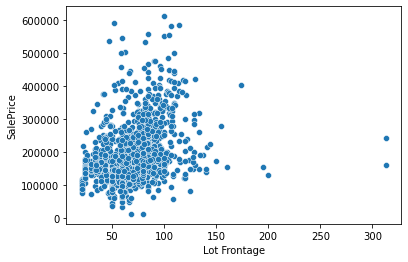

In [5]:
#Lot Frontage
df['Lot Frontage'].sort_values();
sns.scatterplot(x=df['Lot Frontage'],y=df['SalePrice']);

All the data is clustered so titghtly together, it doesn't seem indicative of a linear relationship.

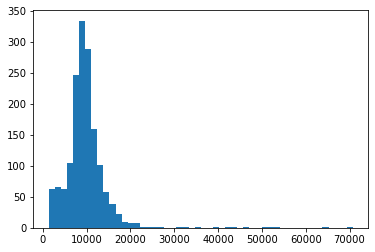

In [6]:
#Lot Area
plt.hist(df['Lot Area'], bins=50);

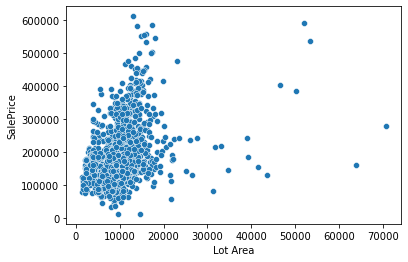

In [7]:
sns.scatterplot(x=df['Lot Area'],y=df['SalePrice']);

No clear relationship between lot area and sale price. 

In [8]:
#Street: only 4 gravel types of 1592 entries. Can probably exlcude from model
df.Street.value_counts()
#df[['Street', 'SalePrice']].groupby(by='Street').mean()

Pave    1588
Grvl       4
Name: Street, dtype: int64

In [9]:
#Alley: can probably be engineered/binarized to alley access: yes1 no0. Because alley seems to indicate lower price.
df.Alley.value_counts()
#df[['Alley', 'SalePrice']].groupby(by='Alley').mean()

NA      1477
Grvl      68
Pave      47
Name: Alley, dtype: int64

In [10]:
#Lot Shape can be a good one to enginner. Interesting categorical relationship with sale price that can be dummified or binarized.
df['Lot Shape'].value_counts();
df[['Lot Shape', 'SalePrice']].groupby(by='Lot Shape').mean().sort_values(by='SalePrice')

,SalePrice
Lot Shape,
Reg,165399.266727
IR3,184023.333333
IR1,227018.575281
IR2,241880.314286


Irregularity in lot shape seems linked to higher sale price.

In [11]:
#Land Contour has interesting relationship w saleprice.
df['Land Contour'].value_counts();
df[['Land Contour', 'SalePrice']].groupby(by='Land Contour').mean().sort_values(by='SalePrice')

,SalePrice
Land Contour,
Bnk,136684.158730
Lvl,181726.267085
Low,192090.476190
HLS,274112.662162


In [12]:
#Utilities, can probably disregard significance since ~no variance (1 entry is diff)
df.Utilities.value_counts()

AllPub    1591
NoSewr       1
Name: Utilities, dtype: int64

In [13]:
#Lot Config, unique col with relationship to salesprice, can engineered
df['Lot Config'].value_counts();
df[['Lot Config', 'SalePrice']].groupby(by='Lot Config').mean().sort_values(by='SalePrice')

,SalePrice
Lot Config,
FR2,175551.818182
Inside,180377.560231
Corner,183013.267176
FR3,200342.857143
CulDSac,266135.029851


In [14]:
#Land Slope, redundancy with Land Contour? it may have price relationship that can be engineered but it's very low variability and price distn is small.
df['Land Slope'].value_counts();
df[['Land Slope', 'SalePrice']].groupby(by='Land Slope').mean()

,SalePrice
Land Slope,
Gtl,183357.549045
Mod,206387.086957
Sev,190995.000000


In [15]:
#Neighborhood. A variable worth engineering for use in modeling
df.Neighborhood.value_counts();
df[['Neighborhood', 'SalePrice']].groupby(by='Neighborhood').mean().sort_values(by='SalePrice')

,SalePrice
Neighborhood,
BrDale,104030.555556
MeadowV,104510.714286
IDOTRR,105270.586957
OldTown,127905.340580
SWISU,132754.962963
BrkSide,133375.819672
Edwards,134650.969697
Sawyer,138334.666667
NPkVill,141256.250000


In [16]:
#Condition 1 - Effects of Condition 1 and 2 can probably be jointly modeled through the engineering of Cond. 1
df['Condition 1'].value_counts()
df[['Condition 1', 'SalePrice']].groupby(by='Condition 1').mean().sort_values(by='SalePrice')

,SalePrice
Condition 1,
Artery,131207.377049
RRAe,138226.666667
Feedr,142263.787500
RRNe,169000.000000
RRAn,169328.935484
Norm,188372.112163
RRNn,192083.333333
PosA,262180.000000
PosN,267527.555556


In [17]:
#Condition 2
df['Condition 2'].value_counts();
df[['Condition 2', 'SalePrice']].groupby(by='Condition 2').mean().sort_values(by='SalePrice')

,SalePrice
Condition 2,
RRNn,96750.000000
Artery,113750.000000
Feedr,133600.000000
Norm,184147.075748
PosA,390666.666667
PosN,395666.666667


In [18]:
#Bldg Type - seems to have price relationship that could be engineered
df['Bldg Type'].value_counts();
df[['Bldg Type', 'SalePrice']].groupby(by='Bldg Type').mean().sort_values(by='SalePrice')

,SalePrice
Bldg Type,
2fmCon,127575.862069
Twnhs,137107.142857
Duplex,140030.238095
1Fam,187431.857357
TwnhsE,200049.639098


In [19]:
#House Style - price relationship seeems to increase with size/complexity - Engineer
df['House Style'].value_counts();
df[['House Style', 'SalePrice']].groupby(by='House Style').mean().sort_values(by='SalePrice')

,SalePrice
House Style,
1.5Unf,119155.555556
1.5Fin,136292.362637
SFoyer,153832.687500
SLvl,163286.014493
1Story,184617.590024
2.5Unf,194318.181818
2Story,208221.719222
2.5Fin,289500.000000


In [20]:
#Overall Qual - Definitely include
df['Overall Qual'].value_counts();
df[['Overall Qual', 'SalePrice']].groupby(by='Overall Qual').mean().sort_values(by='SalePrice')

,SalePrice
Overall Qual,
1,47300.000000
2,49478.625000
3,90826.666667
4,107804.224299
5,134317.361364
6,159215.274869
7,201197.927326
8,274475.965347
9,378763.352113


In [21]:
#Overall Cond
df['Overall Cond'].value_counts();
df[['Overall Cond', 'SalePrice']].groupby(by='Overall Cond').mean().sort_values(by='SalePrice')

,SalePrice
Overall Cond,
1,50000.000000
2,55596.333333
3,96910.550000
4,115162.181818
6,148715.414894
7,150471.395238
8,155939.880952
9,202797.058824
5,211905.050000


In [22]:
#Year Built - can engineer... binarize by before or after 1960? Orr include as is...?
df[['Year Built', 'SalePrice']].groupby(by='Year Built').mean().sort_values(by='SalePrice');

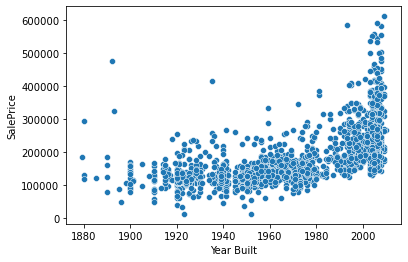

In [23]:
sns.scatterplot(x=df['Year Built'],y=df['SalePrice']);

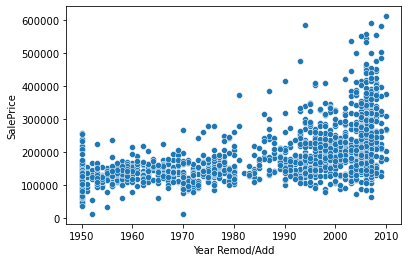

In [24]:
#Year Remod/Add - can be engineered either binarized before/after year...1990? or other.
sns.scatterplot(x=df['Year Remod/Add'],y=df['SalePrice']);

In [25]:
#Roof Style - engineered to is Gambrel or Mansard and is other? Or dummied
df['Roof Style'].value_counts()
df[['Roof Style', 'SalePrice']].groupby(by='Roof Style').mean().sort_values(by='SalePrice')

,SalePrice
Roof Style,
Gambrel,143409.090909
Mansard,147666.666667
Gable,172756.545382
Flat,199333.333333
Shed,218000.000000
Hip,232134.028662


In [26]:
#Roof Matl - may be best to dummy but not many unique entries although higher prices seen in WdShake WdShngl and Memran
df['Roof Matl'].value_counts()
df[['Roof Matl', 'SalePrice']].groupby(by='Roof Matl').mean().sort_values(by='SalePrice')

,SalePrice
Roof Matl,
ClyTile,160000.000000
CompShg,183771.622857
Tar&Grv,188562.500000
WdShake,238750.000000
Membran,241500.000000
WdShngl,339400.000000


In [27]:
#Exterior 1st
df['Exterior 1st'].value_counts()
df[['Exterior 1st', 'SalePrice']].groupby(by='Exterior 1st').mean().sort_values(by='SalePrice')

,SalePrice
Exterior 1st,
CBlock,93250.000000
AsbShng,106700.000000
BrkComm,131000.000000
Wd Sdng,143718.690000
Stucco,145021.052632
HdBoard,154267.497696
MetalSd,154987.017921
WdShing,160724.114286
Plywood,167365.932692


In [28]:
#Exterior 2nd
df['Exterior 2nd'].value_counts();
df[['Exterior 2nd', 'SalePrice']].groupby(by='Exterior 2nd').mean().sort_values(by='SalePrice');

It looks like the effects of feeature Exterior 1 and 2 can be included with only Ext.1st through some engineering by grouping .

In [29]:
#Mas Vnr Type. no entries for Brk Face. Stone and Brick seem related to higher prices so perhaps binarize feature by those two.
df['Mas Vnr Type'].value_counts()
df[['Mas Vnr Type', 'SalePrice']].groupby(by='Mas Vnr Type').mean().sort_values(by='SalePrice')

,SalePrice
Mas Vnr Type,
BrkCmn,140913.000000
None,155411.290052
BrkFace,215725.581395
Stone,268855.897436


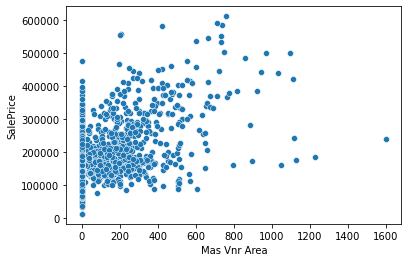

In [30]:
#Mas Vnr Area - most entries are 0. Can be binarized or maybe ignored. Engineering of Mas Vnr Type can probably account for all veneer data
sns.scatterplot(x='Mas Vnr Area', y='SalePrice', data=df);

In [31]:
df['Mas Vnr Area'].value_counts();

In [32]:
#Exter Qual
df['Exter Qual'].value_counts()
df[['Exter Qual', 'SalePrice']].groupby(by='Exter Qual').mean().sort_values(by='SalePrice')

,SalePrice
Exter Qual,
Fa,92740.400000
TA,142564.987355
Gd,232137.576087
Ex,377626.118421


In [33]:
#Exter Cond
df['Exter Cond'].value_counts()
df[['Exter Cond', 'SalePrice']].groupby(by='Exter Cond').mean().sort_values(by='SalePrice')

,SalePrice
Exter Cond,
Po,13100.000000
Fa,111910.066667
Gd,164292.888199
TA,188068.437590
Ex,255974.500000


Exterior Ordinals for material quality and present condition are pretty straightforward and seem like they will be productive for modeling post-engineering.

In [34]:
#Foundation - Looks to be worth binarizing by is PConc and is not
df['Foundation'].value_counts()

PConc     731
CBlock    650
BrkTil    185
Slab       21
Stone       4
Wood        1
Name: Foundation, dtype: int64

In [35]:
df[['Foundation', 'SalePrice']].groupby(by='Foundation').mean().sort_values(by='SalePrice')

,SalePrice
Foundation,
Slab,109970.190476
BrkTil,133229.097297
Wood,145500.000000
CBlock,146292.969231
Stone,149544.000000
PConc,233562.165527


In [36]:
#Bsmt Qual
df['Bsmt Qual'].value_counts()

TA    685
Gd    661
Ex    159
Fa     50
NA     36
Po      1
Name: Bsmt Qual, dtype: int64

In [37]:
df[['Bsmt Qual', 'SalePrice']].groupby(by='Bsmt Qual').mean().sort_values(by='SalePrice')

,SalePrice
Bsmt Qual,
Po,89000.000000
NA,104370.416667
Fa,114123.600000
TA,139785.169343
Gd,203499.543116
Ex,337775.169811


Basement Condition seems like a good feature to binarize by is Gd or Ex and is not.

In [38]:
#Bsmt Cond
df['Bsmt Cond'].value_counts()

TA    1430
Gd      72
Fa      49
NA      36
Ex       3
Po       2
Name: Bsmt Cond, dtype: int64

In [39]:
df[['Bsmt Cond', 'SalePrice']].groupby(by='Bsmt Cond').mean().sort_values(by='SalePrice')

,SalePrice
Bsmt Cond,
NA,104370.416667
Fa,122563.571429
Po,167458.000000
TA,186497.391608
Ex,195000.000000
Gd,224314.861111


Appears like dummy columns would be the best way to enginneer if at all. Low variance by Cond ranking so might not be worth it to the model. 

In [40]:
#Bsmt Exposure
df['Bsmt Exposure'].value_counts()
df[['Bsmt Exposure', 'SalePrice']].groupby(by='Bsmt Exposure').mean().sort_values(by='SalePrice')

,SalePrice
Bsmt Exposure,
NA,104370.416667
No,164922.991346
Mn,188743.312500
Av,212980.330396
Gd,284111.062112


In [41]:
#BsmtFin Type 1
df['BsmtFin Type 1'].value_counts()
df[['BsmtFin Type 1', 'SalePrice']].groupby(by='BsmtFin Type 1').mean().sort_values(by='SalePrice')

,SalePrice
BsmtFin Type 1,
NA,104370.416667
Rec,142358.814103
BLQ,146656.348684
LwQ,150575.926829
ALQ,162322.209821
Unf,171831.522293
GLQ,245494.019108


Could binarize because GLQ seems to add definite value to house price.

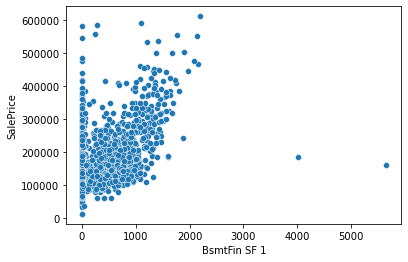

In [42]:
#BsmtFin SF 1
sns.scatterplot(x=df['BsmtFin SF 1'], y=df['SalePrice']);

In [43]:
df['BsmtFin SF 1'].describe()

count    1592.000000
mean      437.999372
std       469.904938
min         0.000000
25%         0.000000
50%       361.000000
75%       719.250000
max      5644.000000
Name: BsmtFin SF 1, dtype: float64

In [44]:
df['BsmtFin SF 1'].sort_values(ascending=False)

738     5644.0
1461    4010.0
1290    2188.0
527     2158.0
477     2146.0
         ...  
980        0.0
264        0.0
261        0.0
987        0.0
1591       0.0
Name: BsmtFin SF 1, Length: 1592, dtype: float64

If Basement is finished it seems to be a linear value add. This makes me want to try to join all of the basement features with a Bsmt Y/N binary feature in a model first before including all these specific baseement features.

In [45]:
#BsmtFin Type 2
df['BsmtFin Type 2'].value_counts()
df[['BsmtFin Type 2', 'SalePrice']].groupby(by='BsmtFin Type 2').mean().sort_values(by='SalePrice')

,SalePrice
BsmtFin Type 2,
NA,104370.416667
BLQ,152080.333333
LwQ,155926.666667
Rec,163123.809524
ALQ,179278.571429
Unf,188847.527941
GLQ,223352.380952


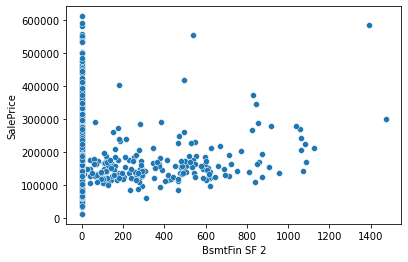

In [46]:
#BsmtFin SF 2
sns.scatterplot(x=df['BsmtFin SF 2'], y=df['SalePrice']);

The Type 2 BSMT features don't seem very useful. to move forward with.

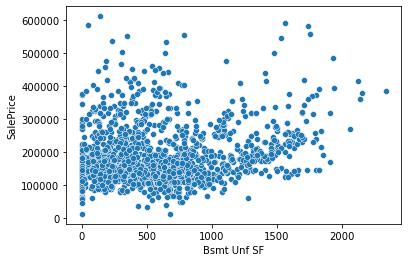

In [47]:
#Bsmt Unf SF
sns.scatterplot(x=df['Bsmt Unf SF'], y=df['SalePrice']);

I'm not immediately sure what to make of this. Plot seeems pretty sprayed out might not be useful to modeling.

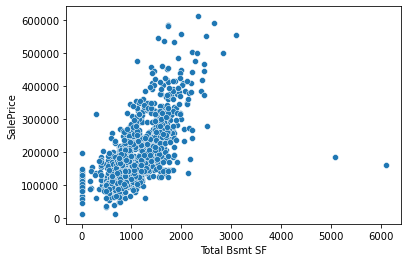

In [48]:
#Total Bsmt SF
sns.scatterplot(x=df['Total Bsmt SF'], y=df['SalePrice']);

This is the linear relationship we like to see. 

In [49]:
# Heating
df['Heating'].value_counts()

GasA    1566
GasW      19
Wall       5
Grav       1
OthW       1
Name: Heating, dtype: int64

In [50]:
df[['Heating', 'SalePrice']].groupby(by='Heating').mean().sort_values(by='SalePrice')

,SalePrice
Heating,
Wall,75080.000000
Grav,80000.000000
OthW,129500.000000
GasW,152394.736842
GasA,185213.541507


Gas heating definitely is favored but there's also low variance in this featurre. Vast majority of houses have GasA and the mean price isn't helpful in explaining prices that stray from mean.

In [51]:
df.SalePrice.mean()

184374.8781407035

In [52]:
#Central Air
df['Central Air'].value_counts()

Y    1504
N      88
Name: Central Air, dtype: int64

In [53]:
df[['Central Air', 'SalePrice']].groupby(by='Central Air').mean().sort_values(by='SalePrice')

,SalePrice
Central Air,
N,104442.295455
Y,189051.784574


Would be easy to binarize but low variance. However, "No" could be helpful for explaining below mean behavior in price in select houses.

In [54]:
#Electrical
df['Electrical'].value_counts()

SBrkr    1453
FuseA     108
FuseF      26
FuseP       4
Mix         1
Name: Electrical, dtype: int64

In [55]:
df[['Electrical', 'SalePrice']].groupby(by='Electrical').mean().sort_values(by='SalePrice')

,SalePrice
Electrical,
Mix,67000.000000
FuseP,86500.000000
FuseF,108061.038462
FuseA,123991.870370
SBrkr,190578.869236


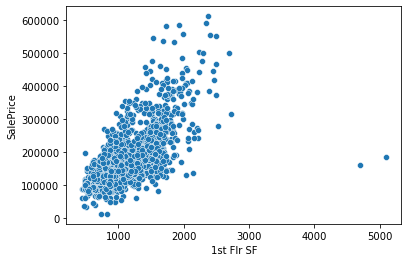

In [56]:
#1st Flr SF
sns.scatterplot(x=df['1st Flr SF'], y=df['SalePrice']);

Strong continuous feature for model input. Outliers?

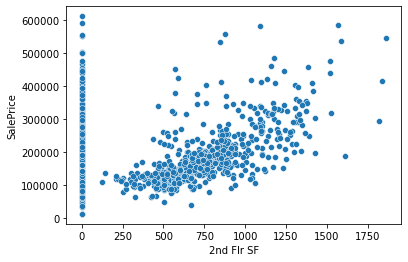

In [57]:
#2nd Flr SF
sns.scatterplot(x=df['2nd Flr SF'], y=df['SalePrice']);

Indicates a second floor and sf has a positive relationship with sale price although it includes some variance.

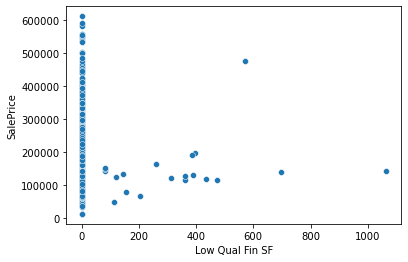

In [58]:
#Low Qual Fin SF
sns.scatterplot(x=df['Low Qual Fin SF'], y=df['SalePrice']);

In [59]:
df['Low Qual Fin SF'].value_counts().head(3)

0      1572
80        3
114       1
Name: Low Qual Fin SF, dtype: int64

Low variance in column, most entries have no low quality finished square feet, I'm not sure how helpful this feature will be in a model.

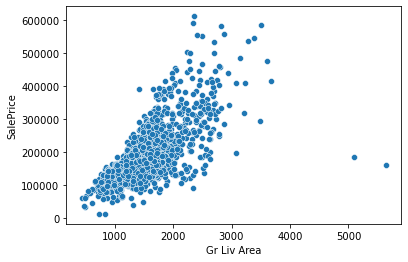

In [60]:
#Gr Liv Area
sns.scatterplot(x=df['Gr Liv Area'], y=df['SalePrice']);

Feature indicates a strong relationship with price, some potential outlier behavior that I can investigate. Includes all above ground SF. How will this feature relate in a model with other features that are included in this SF total?

0.0    942
1.0    632
2.0     18
Name: Bsmt Full Bath, dtype: int64

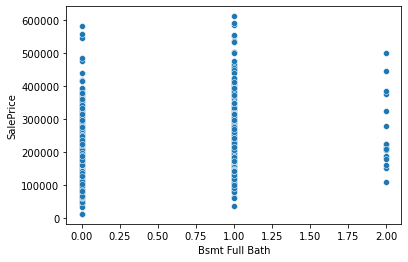

In [61]:
#Bsmt Full Bath
sns.scatterplot(x=df['Bsmt Full Bath'], y=df['SalePrice']);
df['Bsmt Full Bath'].value_counts()

In [62]:
df[['Bsmt Full Bath', 'SalePrice']].groupby(by='Bsmt Full Bath').mean().sort_values(by='SalePrice')

,SalePrice
Bsmt Full Bath,
0.0,165528.867304
1.0,210476.661392
2.0,254186.833333


0.0    1492
1.0      98
2.0       2
Name: Bsmt Half Bath, dtype: int64

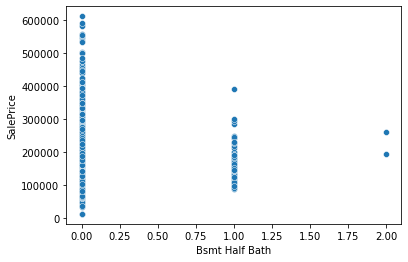

In [63]:
#Bsmt Half Bath
sns.scatterplot(x=df['Bsmt Half Bath'], y=df['SalePrice']);
df['Bsmt Half Bath'].value_counts()

In [64]:
df[['Bsmt Half Bath', 'SalePrice']].groupby(by='Bsmt Half Bath').mean().sort_values(by='SalePrice')

,SalePrice
Bsmt Half Bath,
1.0,160865.959184
0.0,185861.756702
2.0,227100.500000


2    852
1    703
3     31
0      6
Name: Full Bath, dtype: int64

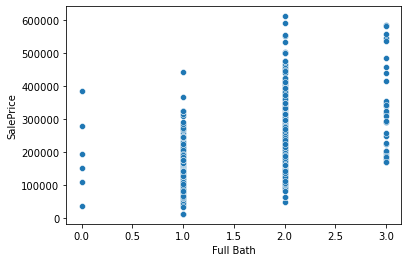

In [65]:
#Full Bath
sns.scatterplot(x=df['Full Bath'], y=df['SalePrice']);
df['Full Bath'].value_counts()

In [66]:
df[['Full Bath', 'SalePrice']].groupby('Full Bath').mean().sort_values('SalePrice')

,SalePrice
Full Bath,
1,135074.064011
0,192634.666667
2,219642.350939
3,331504.774194


0    1021
1     562
2       9
Name: Half Bath, dtype: int64

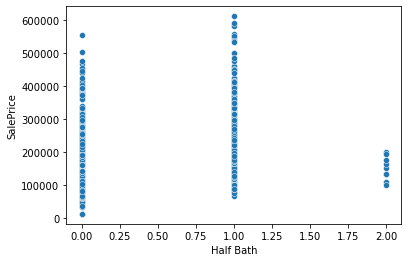

In [67]:
#Half Bath
sns.scatterplot(x=df['Half Bath'], y=df['SalePrice']);
df['Half Bath'].value_counts()

In [68]:
df[['Half Bath', 'SalePrice']].groupby('Half Bath').mean().sort_values('SalePrice')

,SalePrice
Half Bath,
2,151627.444444
0,166996.206660
1,216471.587189


3    868
2    438
4    195
1     53
5     28
6      6
0      4
Name: Bedroom AbvGr, dtype: int64

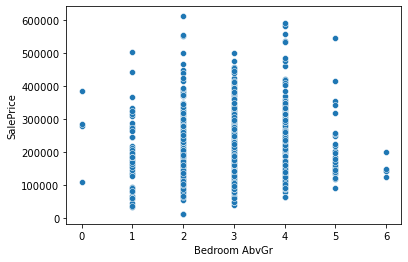

In [69]:
#Bedroom AbvGr
sns.scatterplot(x=df['Bedroom AbvGr'], y=df['SalePrice']);
df['Bedroom AbvGr'].value_counts()

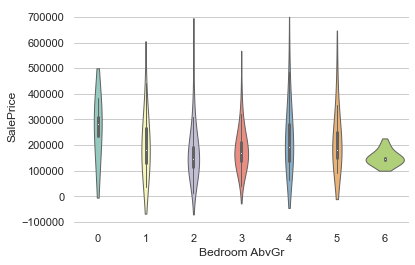

<Figure size 432x288 with 0 Axes>

In [70]:
sns.figsize=(20,10)
sns.set_theme(style='whitegrid')
sns.violinplot(x=df['Bedroom AbvGr'], y=df['SalePrice'], palette='Set3', bw=1, cut=1, linewidth=1)
sns.despine(left=True, bottom=True)
plt.title=('Bedrooms vs SalePrice');
plt.show()
plt.savefig('../images/BdrmViolin.png')

In [71]:
df[['Bedroom AbvGr', 'SalePrice']].groupby('Bedroom AbvGr').mean().sort_values('SalePrice')

,SalePrice
Bedroom AbvGr,
6,150589.333333
2,168230.315068
3,182446.968894
1,191154.132075
5,214115.142857
4,222497.800000
0,264739.750000


How should I deal with entries that have 0 values for features like Bedrooms AbvGR and Full Baths, which doesn't seem to make any sense?

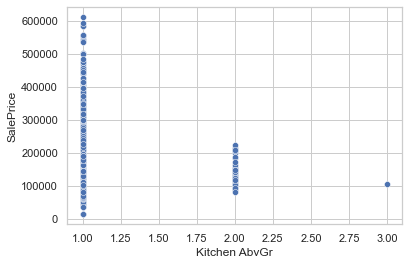

In [72]:
#Kitchen AbvGr
sns.scatterplot(x=df['Kitchen AbvGr'], y=df['SalePrice']);

In [73]:
df[['Kitchen AbvGr', 'SalePrice']].groupby('Kitchen AbvGr').mean().sort_values('SalePrice')

,SalePrice
Kitchen AbvGr,
3,106000.000000
2,134832.040816
1,186000.023346


In [74]:
#Kitchen Qual
df['Kitchen Qual'].value_counts()

TA    806
Gd    623
Ex    134
Fa     29
Name: Kitchen Qual, dtype: int64

In [75]:
df[['Kitchen Qual', 'SalePrice']].groupby('Kitchen Qual').mean().sort_values('SalePrice')

,SalePrice
Kitchen Qual,
Fa,110192.862069
TA,139073.828784
Gd,212484.203852
Ex,342224.238806


Home buyers love a good kitchen. Seems like a great variable for modeling after dummifying. 

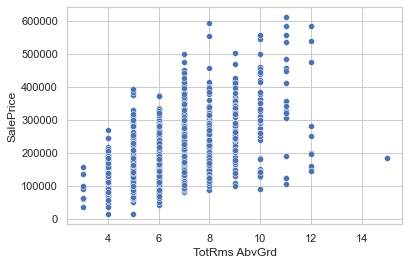

In [76]:
#TotRmsAbvGrd
sns.scatterplot(x=df['TotRms AbvGrd'], y=df['SalePrice']);

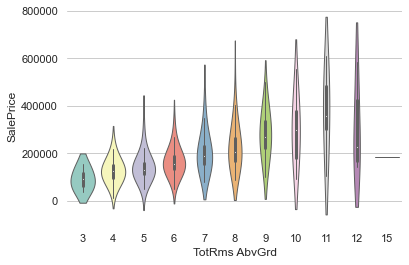

In [77]:
sns.set_theme(style='whitegrid')
sns.violinplot(x=df['TotRms AbvGrd'], y=df['SalePrice'], palette='Set3', bw=1, cut=1, linewidth=1)
sns.despine(left=True, bottom=True)
plt.title='Total # Rooms vs SalePrice'
plt.savefig('../images/TotRmViolin.png')

Wide distn in sales price but can probably be included in models.

In [78]:
#Functional
df.Functional.value_counts()

Typ     1491
Min1      33
Min2      32
Mod       21
Maj1       8
Maj2       5
Sal        2
Name: Functional, dtype: int64

In [79]:
df[['Functional', 'SalePrice']].groupby('Functional').mean().sort_values('SalePrice')

,SalePrice
Functional,
Sal,31550.000000
Maj2,98620.800000
Min1,146046.212121
Min2,149760.375000
Maj1,152518.750000
Mod,166117.333333
Typ,186886.741113


Might not ve very useful for informing behavior besides mean with the exception of Sal which can indicate whether a home is bought for destruction. Binarizing could be useful although I wonder if this effect can be drawn from other features.

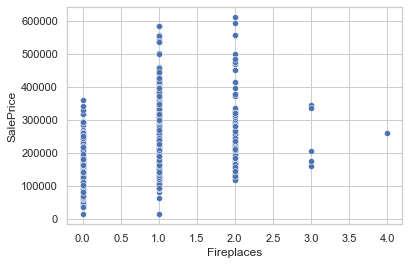

In [80]:
#Fireplaces
sns.scatterplot(x=df['Fireplaces'], y=df['SalePrice']);

Perhaps the effects of this feature is better seen thrrough fireplace Y/N although there are returns from 0-2 forr modeling purposes.

In [81]:
#Garage Type
df['Garage Type'].value_counts()

Attchd     976
Detchd     480
BuiltIn     96
Basment     17
2Types      15
CarPort      8
Name: Garage Type, dtype: int64

In [82]:
df[['Garage Type', 'SalePrice']].groupby('Garage Type').mean().sort_values('SalePrice')

,SalePrice
Garage Type,
CarPort,95257.375000
Detchd,130376.929167
Basment,137102.529412
2Types,157200.000000
Attchd,205569.419057
BuiltIn,258930.468750


The feature's types seem to have clear relationships with sale price. Feature ought to be considered for engineering/dummifying.

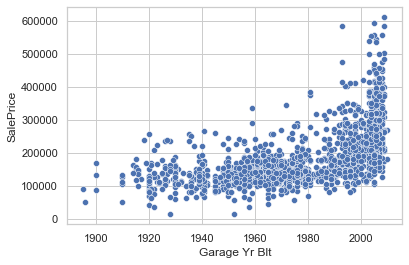

In [83]:
#Garage Yr Blt
sns.scatterplot(x=df['Garage Yr Blt'], y=df['SalePrice']);

Relationship with garage age seems to be strong.

In [84]:
#Garage Finish
df['Garage Finish'].value_counts()

Unf    719
RFn    469
Fin    404
Name: Garage Finish, dtype: int64

In [85]:
#Interesting that these all have garages.
df[['Garage Finish', 'SalePrice']].groupby('Garage Finish').mean().sort_values('SalePrice')

,SalePrice
Garage Finish,
Unf,137196.326843
RFn,203972.590618
Fin,245587.876238


Feature seems worth engineering: high variance within feauture and high variance in mean price across feature value.

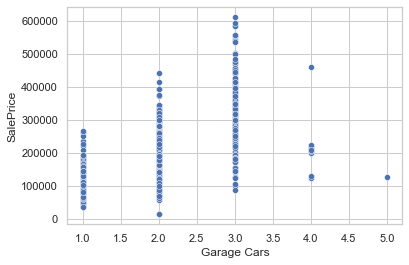

In [86]:
#Garage Cars
sns.scatterplot(x=df['Garage Cars'], y=df['SalePrice']);

Mean price seems uniform across featurre but can explain above mean price behavior too potentially.

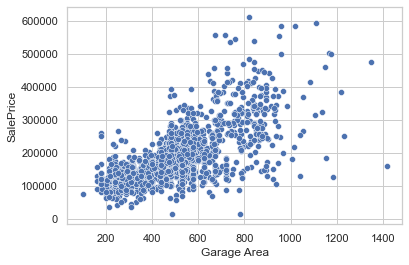

In [87]:
#Garage Area
sns.scatterplot(x=df['Garage Area'], y=df['SalePrice']);

Wide distribution but theres strong clustering and can explain abnormal price behavior especially in upper bounds.

In [88]:
#Garage Qual
df['Garage Qual'].value_counts()

TA    1497
Fa      76
Gd      14
Ex       3
Po       2
Name: Garage Qual, dtype: int64

In [89]:
df[['Garage Qual', 'SalePrice']].groupby('Garage Qual').mean().sort_values('SalePrice')

,SalePrice
Garage Qual,
Po,65000.000000
Fa,115633.697368
TA,187132.737475
Ex,241000.000000
Gd,267566.928571


In [90]:
#Garage Cond
df['Garage Cond'].value_counts()

TA    1533
Fa      42
Po       8
Gd       7
Ex       2
Name: Garage Cond, dtype: int64

In [91]:
df[['Garage Cond', 'SalePrice']].groupby('Garage Cond').mean().sort_values('SalePrice')

,SalePrice
Garage Cond,
Po,89925.000000
Fa,103362.714286
Ex,124000.000000
TA,187127.378995
Gd,192842.857143


Garage Cond and Garage Qual seem like excellent options for dummifying and inclusion in model.

In [92]:
#Paved Drive
df['Paved Drive'].value_counts()

Y    1467
N      92
P      33
Name: Paved Drive, dtype: int64

In [93]:
df[['Paved Drive', 'SalePrice']].groupby('Paved Drive').mean().sort_values('SalePrice')

,SalePrice
Paved Drive,
N,109155.141304
P,130004.666667
Y,190315.186776


Best use seems to binarize by Y and not Y to simplify effects in price distn.

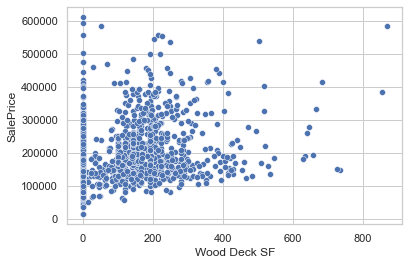

In [94]:
#Wood Deck SF
sns.scatterplot(x=df['Wood Deck SF'], y=df['SalePrice']);

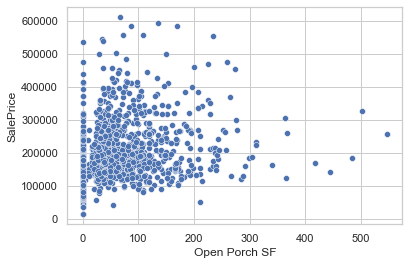

In [95]:
#Open Porch SF
sns.scatterplot(x=df['Open Porch SF'], y=df['SalePrice']);

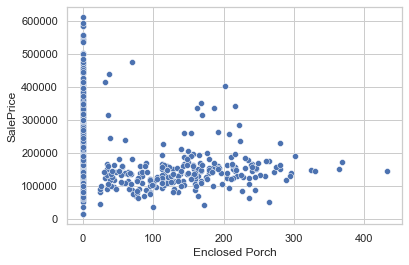

In [96]:
#Enclosed Porch
sns.scatterplot(x=df['Enclosed Porch'], y=df['SalePrice']);

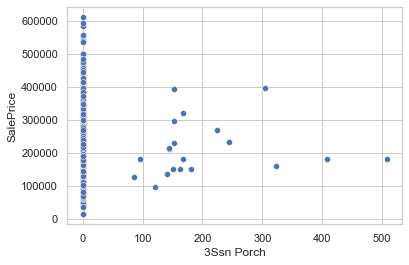

In [97]:
#3Ssn Porch
sns.scatterplot(x=df['3Ssn Porch'], y=df['SalePrice']);

In [98]:
df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,60,RL,43.0,11492,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NA,NA,NA,0,4,2009,WD,220000
1,20,RL,68.0,7922,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NA,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NA,NA,NA,0,1,2010,WD,109000
2,60,RL,73.0,9802,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NA,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NA,NA,NA,0,4,2010,WD,174000
3,50,RL,82.0,14235,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NA,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NA,NA,NA,0,3,2010,WD,138500
4,20,RL,137.0,16492,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,NAmes,PosA,Norm,1Fam,1Story,6,6,1966,2002,Gable,CompShg,BrkFace,Plywood,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,247.0,Rec,713.0,557.0,1517.0,GasA,Ex,Y,SBrkr,1888,0,0,1888,0.0,0.0,2,1,2,1,Gd,6,Mod,1,Gd,Attchd,1966.0,Fin,2.0,578.0,TA,TA,Y,0,0,0,0,0,0,NA,NA,NA,0,6,2010,WD,190000


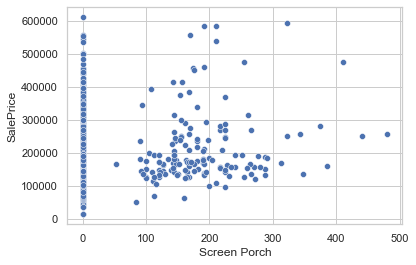

In [99]:
#Screen Porch
sns.scatterplot(x=df['Screen Porch'], y=df['SalePrice']);

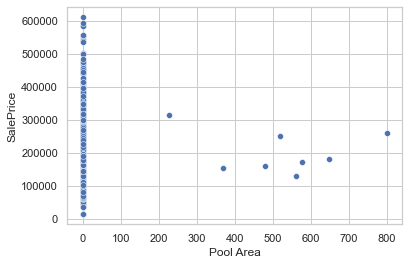

In [100]:
#Pool Area
sns.scatterplot(x=df['Pool Area'], y=df['SalePrice']);

In [101]:
#Pool QC
df['Pool QC'].value_counts()

NA    1584
Gd       3
Fa       2
TA       2
Ex       1
Name: Pool QC, dtype: int64

In [102]:
df[['Pool QC', 'SalePrice']].groupby('Pool QC').mean().sort_values('SalePrice')

,SalePrice
Pool QC,
TA,141500.000000
NA,184283.337121
Gd,197000.000000
Fa,215500.000000
Ex,315000.000000


Pool features have very low variance in entry val but can explain non mean behavior with great pools rraking in big bucks. Consider for potential engineering. 

In [103]:
#Fence
df.Fence.value_counts()

NA       1284
MnPrv     174
GdPrv      67
GdWo       58
MnWw        9
Name: Fence, dtype: int64

In [104]:
df[['Fence', 'SalePrice']].groupby('Fence').mean().sort_values('SalePrice')

,SalePrice
Fence,
MnWw,137822.222222
GdWo,145405.741379
MnPrv,149346.810345
GdPrv,171111.313433
NA,191900.366044


In [105]:
#Misc Feature
df['Misc Feature'].value_counts()

NA      1543
Shed      42
Gar2       3
Othr       2
TenC       1
Elev       1
Name: Misc Feature, dtype: int64

In [106]:
df[['Misc Feature', 'SalePrice']].groupby('Misc Feature').mean().sort_values('SalePrice')

,SalePrice
Misc Feature,
Gar2,132000.000000
Shed,154017.690476
Elev,183850.000000
NA,185218.219702
Othr,217250.000000
TenC,250000.000000


Randomness of category and mean sale price by category probably render this useless.

In [107]:
#Misc Val
df['Misc Val'].value_counts()

0        1543
400        10
600         5
500         5
2000        4
450         3
3000        2
4500        2
700         2
54          1
17000       1
1300        1
2500        1
800         1
1200        1
6500        1
1150        1
900         1
300         1
455         1
460         1
12500       1
480         1
650         1
80          1
Name: Misc Val, dtype: int64

Value of misc. features seems completely random and could even be counterproductive.

In [108]:
#Mo Sold
df['Mo Sold'].value_counts()

6     272
7     240
5     192
4     168
8     133
3     126
10     95
2      83
9      81
11     81
1      64
12     57
Name: Mo Sold, dtype: int64

In [109]:
df[['Mo Sold', 'SalePrice']].groupby('Mo Sold').mean().sort_values('SalePrice')

,SalePrice
Mo Sold,
4,168851.571429
2,176989.855422
3,178801.857143
10,181708.957895
5,182259.942708
6,185468.897059
11,185718.296296
12,186411.175439
8,189919.541353


Month appears a bit too random for use.

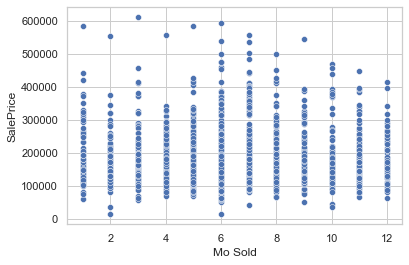

In [110]:
sns.scatterplot(x=df['Mo Sold'], y=df['SalePrice']);

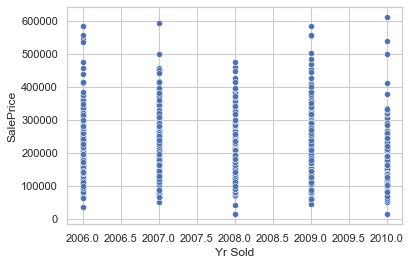

In [111]:
#Yr Sold
sns.scatterplot(x=df['Yr Sold'], y=df['SalePrice']);

In [112]:
#Sale Type
df[['Sale Type', 'SalePrice']].groupby('Sale Type').mean().sort_values('SalePrice')

,SalePrice
Sale Type,
Oth,117945.500000
ConLw,124600.000000
COD,125547.765957
ConLD,138157.923077
WD,176444.739003
CWD,188856.250000
ConLI,228190.000000
Con,241807.500000
New,282496.270833


Some manner of engineering could make use out of this col for modeling purposes but the distn of mean prices across categorical value doesn't seem that productive although could have something to say about lowest and highest behavior.

In [113]:
df['Sale Type'].value_counts()

WD       1364
New       144
COD        47
ConLD      13
CWD         8
ConLI       5
ConLw       5
Con         4
Oth         2
Name: Sale Type, dtype: int64